# Gas Deviation Factor Determination using PR EOS
**From 0 to 1111 psi at 111 F**

**Martinus Bhima Prajna I./12218010**

In [73]:
# PENG-ROBINSON (PR) Equation of State (EOS)
import math
import numpy as np
import pandas as pd
from sympy import var, solveset, S
from sympy import Symbol
from matplotlib import pyplot as plt

In [74]:
def b(R,Tc,Pc):
  return(0.0778*R*Tc/Pc)

In [75]:
def a(R,Tc,Pc):
  return(0.45724*R*R*Tc*Tc/Pc)

In [76]:
def a1(T):
  w = 0.011
  Tc = 190.4 #Critical Temperature Methane in Kelvin
  Tr = T/Tc
  beta = 0.37464+1.5422*w-0.26992*w**2
  return((1+beta*(1-math.sqrt(Tr)))**2)

In [77]:
#Beggs-Brill Z Factor Correlation
def ZBB(P,T):
  Pc = 667.174
  Pr = P/Pc
  Tc = 346.97 #In Rankine
  Tr = (T+460)/Tc
  A = 1.39*(Tr-0.92)**0.5-0.36*Tr-0.101
  A1 = (1-(1.39*(Tr-0.92)**0.5-0.36*Tr-0.101))/math.exp((0.62-0.23*Tr)*Pr+(0.066/(Tr-0.86)-0.037)*Pr**2+0.32/10**(9*(Tr-1))*Pr**6)
  A2 = (0.132-0.32*math.log(Tr,10))*Pr**(10**(0.3106-0.49*Tr+0.1824*Tr**2))
  return(A+A1+A2)

In [78]:
# Input Data
T = 317.039 #In Kelvin
R = 8.314
Tc = 190.56
Pc = 4.6 # Critical pressure in MPa 

In [79]:
P = 0
result_y = []
result_x = []
for P in range (0,1112,1):
  P = P*0.00689476
  A = a(R,Tc,Pc)*a1(T)*P/(R**2*T**2)
  B = b(R,Tc,Pc)*P/(R*T)
  c3 = 1
  c2 = -(1-B)
  c1 = A-3*B**2-2*B
  c0 = -(A*B-B**2-B**3)
  Z = Symbol('Z', real=True)
  result = list(solveset(c3*Z**3+c2*Z**2+c1*Z+c0, Z, domain=S.Reals))
  if len(result)>1:
    result=result[1]
  else:
    result=result[0]
  result_y.append(result)
  result_x.append(P)
# print (result_y)
# print(result_x)

In [80]:
# Convert MPa to psi again
result_x_psi=[]
for i in range (len(result_x)):
  result_x[i] = result_x[i]*145.038
  result_x_psi.append(result_x[i])
# print(result_x_psi)

In [81]:
P = 0
result_ycorr = []
result_xcorr = []
for P in range(0,1112,1):
  Z_corr = ZBB(P,111)
  result_ycorr.append(Z_corr)
  result_xcorr.append(P)
# print(result_ycorr)

In [82]:
# dict = {'Pressure [psi]': result_x_psi, 'Gas Deviation Factor (Z)': result_y}
# df = pd.DataFrame(dict)
# # df.to_csv("result.csv", index="False")
# df

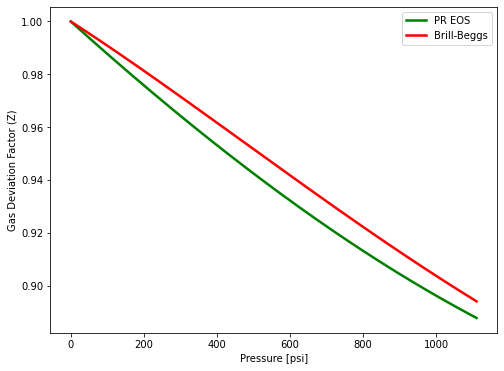

In [83]:
plt.figure(figsize=(8, 6))
plt.plot(result_x_psi,result_y,linewidth=2.5, color="green", label = "PR EOS")
plt.plot(result_xcorr,result_ycorr,linewidth=2.5, color="red", label = "Brill-Beggs")
plt.xticks(np.arange(0, 1112, 200))
# plt.yticks(np.arange(0.86, 1.01, 0.01))
plt.xlabel("Pressure [psi]")
plt.ylabel("Gas Deviation Factor (Z)")
plt.legend()